<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/98_Detecting_Photoshopped_Faces_by_Scripting_Photoshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">
</div>
<h1>Detecting Photoshopped Faces by Scripting Photoshop</h1>

<hr>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดย โปรแกรมเมอร์ไทย thai programmer</font></a>



<pre>
เป็นงานวิจัย AI จาก UC Berkeley ร่วมมือกับ Adobe
เมื่อ AI สามารถตรวจจับภาพใบหน้าคนจากโปรแกรมตกแต่งภาพ 
เช่น Phtotoshop

โดยสามารถตรววจับว่าภาพหน้าคน มันถูกตบแต่งรีทัชหรือไม่
พร้อมระบุตำแหน่งที่ว่าจุดไหนที่ไปแก้ไขมันได้อีกด้วย

โดยผลงานวิจัยระบุ AI มีความแม่นยำสูงถึง 99.4 % มากกว่าคน 53.5%
อีกทั้ง AI ยังแนะนำให้เราสามารถ undo ย้อนภาพที่ได้ตกแต่ง
ให้กลับมาเป็นภาพต้นฉบับดั้งเดิมอีกด้วย .....จะเทพไปไหน

ทั้งนี้การทดลองเขาใช้ Face-Aware Liquify 
ซึ่งเป็นเครื่องมือของโปรแกรม Phtotoshop 
ในการปรับแต่งโครงหน้า ตา จมูก ปาก ได้อย่างง่ายดาย 

แล้วก็มาเทรนสอนให้ AI ตรวจจับ พร้อมแก้ไขกลับเป็นภาพดั้งเดิม
</pre>

cite

* https://github.com/peterwang512/FALdetector
* https://peterwang512.github.io/FALdetector/
* https://arxiv.org/abs/1906.05856

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">

In [ ]:
!git clone https://github.com/PeterWang512/FALdetector.git

Cloning into 'FALdetector'...
remote: Enumerating objects: 116, done.
remote: Total 116 (delta 0), reused 0 (delta 0), pack-reused 116
Receiving objects: 100% (116/116), 21.21 MiB | 42.58 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
%cd /content/FALdetector/

/content/FALdetector


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 245kB 18.8MB/s 
     |████████████████████████████████| 194kB 38.2MB/s 
  Created wheel for mmcv: filename=mmcv-1.2.0-cp36-cp36m-linux_x86_64.whl size=402631 sha256=955eddd77ce819cb8b61f889b0ff6d76bb753bdee3f403eea6414f277e10f424
  Stored in directory: /root/.cache/pip/wheels/ab/0a/b5/263a057c5aeedf3e417ca001122b1c012400b4d6ead29e934a
Successfully built mmcv


In [ ]:
!bash weights/download_weights.sh

--2020-11-18 21:52:46--  https://www.dropbox.com/s/rb8zpvrbxbbutxc/global.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rb8zpvrbxbbutxc/global.pth [following]
--2020-11-18 21:52:46--  https://www.dropbox.com/s/raw/rb8zpvrbxbbutxc/global.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23ebce5f2d5fc8db2fa2f9d3b0.dl.dropboxusercontent.com/cd/0/inline/BDcc8TunTkZ5BF47E9r_blRokkA8-8MG-akMoWYzKaDiM4tLFwbcMZTIcAEpP_hhF_GnOdvdV2X7OujtuEj29aXKlLD3ufETUH80Iq4C2OubUKpzzJVti8i9gn_W4_fz6gE/file# [following]
--2020-11-18 21:52:46--  https://uc23ebce5f2d5fc8db2fa2f9d3b0.dl.dropboxusercontent.com/cd/0/inline/BDcc8TunTkZ5BF47E9r_blRokkA8-8MG-akMoWYzKaDiM4tLFwbcMZTIcAEpP_hhF_GnOdvdV2X7OujtuEj29aXKlLD3ufETUH80Iq4C2OubUKpzzJV

In [ ]:
import PIL.Image 
from IPython.display import display, Image

def display_image(file_img, scale=1):
  im = PIL.Image .open(file_img)
  w, h = im.size  
  display(Image(filename=file_img ,width=int(w*scale), height=int(h*scale) ) )

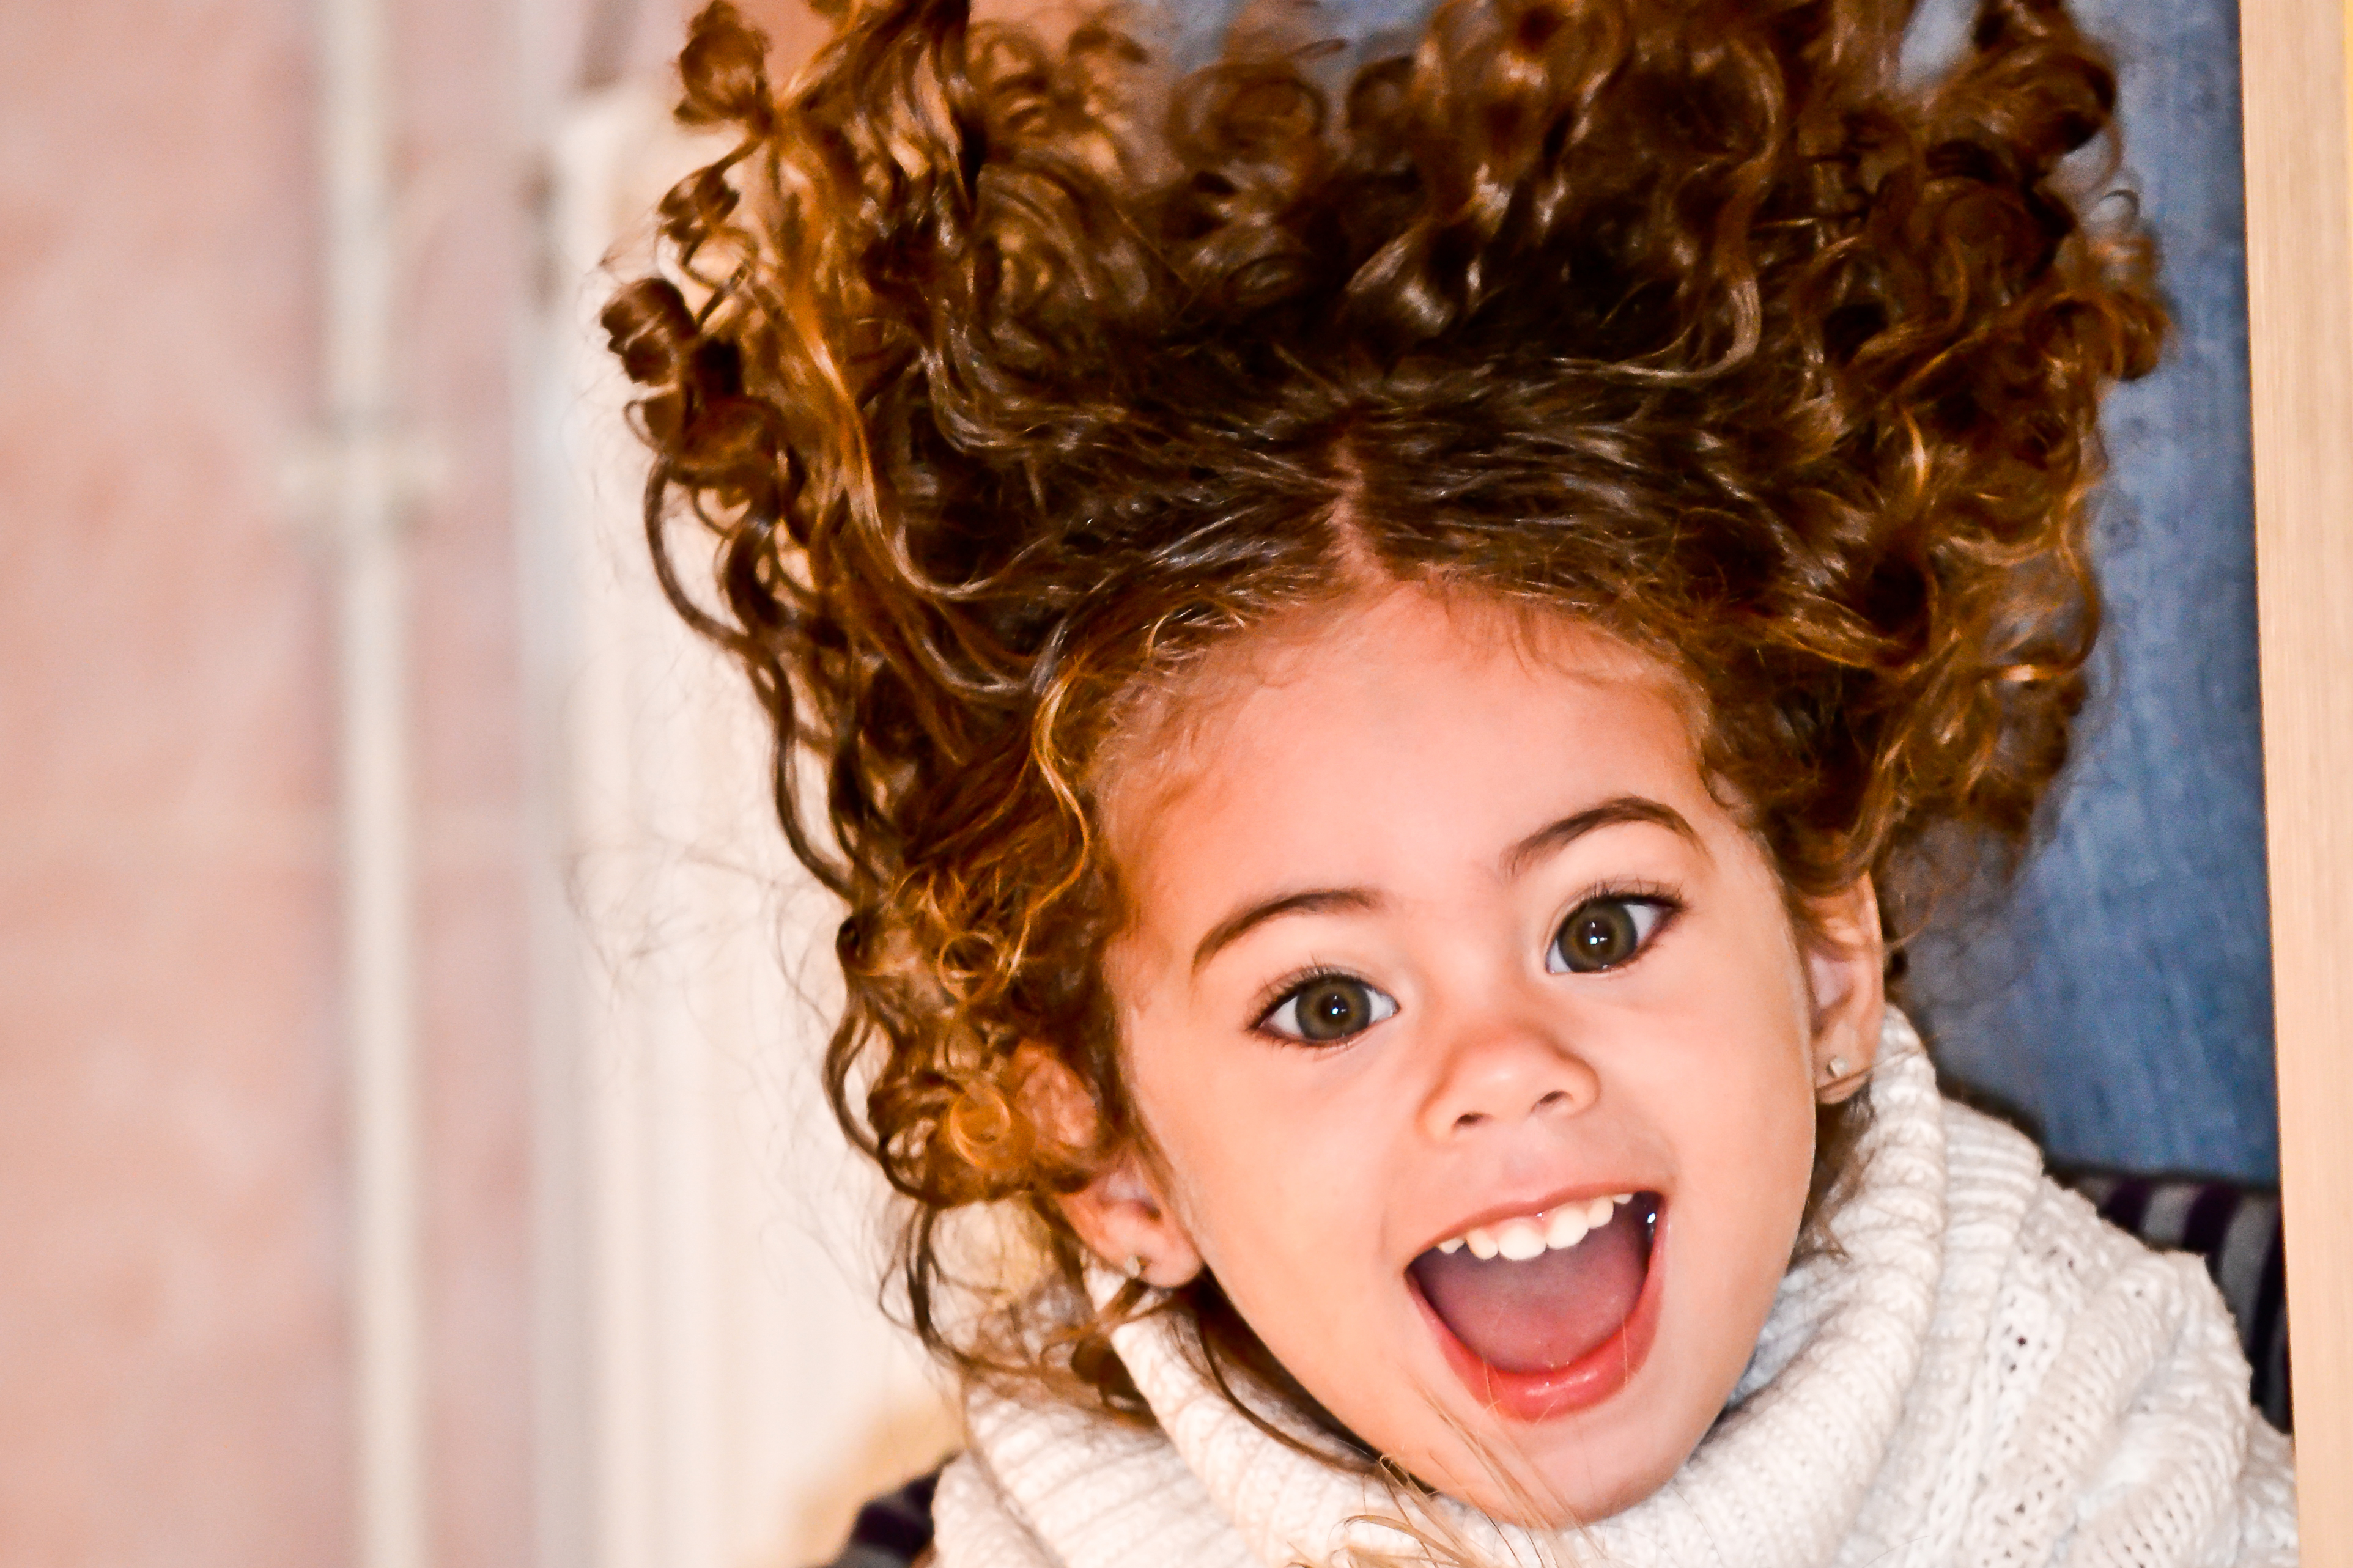

In [ ]:
display_image("examples/modified.jpg", scale=0.1)

In [ ]:
!python global_classifier.py --input_path examples/modified.jpg --model_path weights/global.pth

Probibility being modified by Photoshop FAL: 98.00%


In [ ]:
!ls /content/FALdetector/out

cropped_input.jpg  heatmap.jpg	warped.jpg


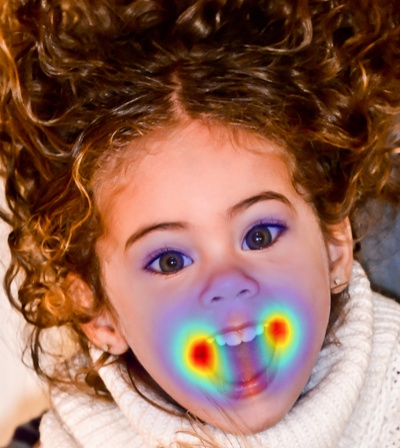

In [ ]:
display_image("out/heatmap.jpg")

In [ ]:
!python local_detector.py --input_path examples/modified.jpg --model_path weights/local.pth --dest_folder out/


# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

In [ ]:
#@title ฝากประชาสัมพันธ์ หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>